In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with the path to your file
file_path = '/logo2/irfan/GBM_project/gbm_model_data_bam_dedupped_motifs_4.txt'

# Read the data
# Assuming your data is tab-separated; if it's comma-separated, use sep=',' instead
df = pd.read_csv(file_path, sep='\t', index_col=0)



In [2]:
df.columns

Index(['H05_B03-auto.final.dedup_motifs.txt',
       'NU13-auto.final.dedup_motifs.txt', '100-auto.final.dedup_motifs.txt',
       'H04_B01-auto.final.dedup_motifs.txt',
       'H02_B01-auto.final.dedup_motifs.txt',
       'H01_TM_ULPWGS-auto.final.dedup_motifs.txt',
       'H05_TM__ULPWGS-auto.final.dedup_motifs.txt',
       'NU68-auto.final.dedup_motifs.txt',
       'H03_TM_ULPWGS-auto.final.dedup_motifs.txt',
       '95-auto.final.dedup_motifs.txt', 'H01_B01-auto.final.dedup_motifs.txt',
       'NU20-auto.final.dedup_motifs.txt',
       'H01_B03-auto.final.dedup_motifs.txt',
       'H02_TM_ULPWGS-auto.final.dedup_motifs.txt',
       'H04_TM_ULPWGS-auto.final.dedup_motifs.txt',
       'H05_B01b-auto.final.dedup_motifs.txt',
       'H01_TM-auto.final.dedup_motifs.txt',
       'H03_B03-auto.final.dedup_motifs.txt',
       'NU45-auto.final.dedup_motifs.txt',
       'H03_TM-auto.final.dedup_motifs.txt',
       'H02_TM-auto.final.dedup_motifs.txt', '103-auto.final.dedup_motifs.txt',
     

In [3]:
df = df.rename(columns={'95-auto.final.dedup_motifs.txt': 'NU95-auto.final.dedup_motifs.txt', '103-auto.final.dedup_motifs.txt':'NU103-auto.final.dedup_motifs.txt','69-auto.final.dedup_motifs.txt':'NU69-auto.final.dedup_motifs.txt','100-auto.final.dedup_motifs.txt':'NU100-auto.final.dedup_motifs.txt'})



In [4]:
print(df.shape)
display(df.head())

(256, 29)


,H05_B03-auto.final.dedup_motifs.txt,NU13-auto.final.dedup_motifs.txt,NU100-auto.final.dedup_motifs.txt,H04_B01-auto.final.dedup_motifs.txt,H02_B01-auto.final.dedup_motifs.txt,H01_TM_ULPWGS-auto.final.dedup_motifs.txt,H05_TM__ULPWGS-auto.final.dedup_motifs.txt,NU68-auto.final.dedup_motifs.txt,H03_TM_ULPWGS-auto.final.dedup_motifs.txt,NU95-auto.final.dedup_motifs.txt,...,H03_TM-auto.final.dedup_motifs.txt,H02_TM-auto.final.dedup_motifs.txt,NU103-auto.final.dedup_motifs.txt,H05_TM-auto.final.dedup_motifs.txt,H03_B01-auto.final.dedup_motifs.txt,H02_B03-auto.final.dedup_motifs.txt,NU69-auto.final.dedup_motifs.txt,H04_TM-auto.final.dedup_motifs.txt,NU56-auto.final.dedup_motifs.txt,H04_B03-auto.final.dedup_motifs.txt
AAAA,5969072,4968581,6098298,5385392,5557758,7576687,12543467,6537460,11993264,5981021,...,9668235,7763899,5267656,9266158,5094571,5473656,6547225,10667521,5341431,5447404
AAAC,1937723,1670298,2089967,1894671,1821346,2677050,4558600,2279274,4374618,2050268,...,3406818,2691504,1850126,3265766,1726307,1795961,2222593,3769736,1861326,1906130
AAAG,2994388,2517709,3122324,2713334,2785461,3616717,6071414,3274260,5855248,3056561,...,4748503,3717181,2697129,4627053,2548896,2784605,3413898,5232694,2664328,2768673
AAAT,3440520,2874131,3527806,3375692,3212180,4735076,8269034,3931440,7799368,3452452,...,6216364,4883094,3080768,5824272,3010634,3160190,3808161,6887669,3257372,3405155
AACA,2160283,1859350,2355790,2207954,2044559,2788807,4745207,2570587,4512367,2308359,...,3561606,2868724,2091434,3482074,1964479,2027055,2511498,3944500,2132644,2212208


In [5]:
# Columns to remove (those containing 'ULPWGS' or 'TM')
cols_to_remove = [col for col in df.columns if 'ULPWGS' in col or 'TM' in col]

# Remove the columns from the DataFrame
df = df.drop(columns=cols_to_remove)


print(df.shape)
display(df.head())

(256, 19)


,H05_B03-auto.final.dedup_motifs.txt,NU13-auto.final.dedup_motifs.txt,NU100-auto.final.dedup_motifs.txt,H04_B01-auto.final.dedup_motifs.txt,H02_B01-auto.final.dedup_motifs.txt,NU68-auto.final.dedup_motifs.txt,NU95-auto.final.dedup_motifs.txt,H01_B01-auto.final.dedup_motifs.txt,NU20-auto.final.dedup_motifs.txt,H01_B03-auto.final.dedup_motifs.txt,H05_B01b-auto.final.dedup_motifs.txt,H03_B03-auto.final.dedup_motifs.txt,NU45-auto.final.dedup_motifs.txt,NU103-auto.final.dedup_motifs.txt,H03_B01-auto.final.dedup_motifs.txt,H02_B03-auto.final.dedup_motifs.txt,NU69-auto.final.dedup_motifs.txt,NU56-auto.final.dedup_motifs.txt,H04_B03-auto.final.dedup_motifs.txt
AAAA,5969072,4968581,6098298,5385392,5557758,6537460,5981021,4684616,5495453,5295767,7730973,6601334,6317561,5267656,5094571,5473656,6547225,5341431,5447404
AAAC,1937723,1670298,2089967,1894671,1821346,2279274,2050268,1603521,1906474,1827659,2510757,2258824,2206769,1850126,1726307,1795961,2222593,1861326,1906130
AAAG,2994388,2517709,3122324,2713334,2785461,3274260,3056561,2366696,2752305,2692727,3935944,3330800,3138544,2697129,2548896,2784605,3413898,2664328,2768673
AAAT,3440520,2874131,3527806,3375692,3212180,3931440,3452452,2793630,3258105,3176593,4427141,3900388,3805687,3080768,3010634,3160190,3808161,3257372,3405155
AACA,2160283,1859350,2355790,2207954,2044559,2570587,2308359,1838089,2143799,2077827,2788410,2561006,2524660,2091434,1964479,2027055,2511498,2132644,2212208


In [6]:
# Calculate total counts for each sample (column)
total_counts = df.sum(axis=0)

# Normalize to Counts Per Million (CPM)
df_cpm = df.divide(total_counts, axis=1) * 1e6

display(df_cpm.head())

,H05_B03-auto.final.dedup_motifs.txt,NU13-auto.final.dedup_motifs.txt,NU100-auto.final.dedup_motifs.txt,H04_B01-auto.final.dedup_motifs.txt,H02_B01-auto.final.dedup_motifs.txt,NU68-auto.final.dedup_motifs.txt,NU95-auto.final.dedup_motifs.txt,H01_B01-auto.final.dedup_motifs.txt,NU20-auto.final.dedup_motifs.txt,H01_B03-auto.final.dedup_motifs.txt,H05_B01b-auto.final.dedup_motifs.txt,H03_B03-auto.final.dedup_motifs.txt,NU45-auto.final.dedup_motifs.txt,NU103-auto.final.dedup_motifs.txt,H03_B01-auto.final.dedup_motifs.txt,H02_B03-auto.final.dedup_motifs.txt,NU69-auto.final.dedup_motifs.txt,NU56-auto.final.dedup_motifs.txt,H04_B03-auto.final.dedup_motifs.txt
AAAA,13912.859444,13071.840589,12655.843950,12979.117693,13788.632671,13108.782712,12578.181213,13139.778138,13232.729536,13057.107699,13710.690037,13321.229769,13131.520527,12435.812099,13369.304085,13534.080142,12694.728100,13112.351761,13034.227393
AAAC,4516.492303,4394.387289,4337.324318,4566.270737,4518.705377,4570.354175,4311.745844,4497.681385,4590.677931,4506.229296,4452.765646,4558.217099,4586.933537,4367.752810,4530.219174,4440.666367,4309.492008,4569.255178,4560.875577
AAAG,6979.393006,6623.841032,6479.782606,6539.297664,6910.646082,6565.480000,6427.995847,6638.294443,6627.389528,6639.118836,6980.299658,6721.422081,6523.697193,6367.346207,6688.878358,6885.172768,6619.370324,6540.495598,6624.717656
AAAT,8019.248415,7561.551731,7321.282466,8135.620167,7969.323258,7883.244059,7260.560845,7835.792389,7845.326357,7832.126473,7851.425429,7870.828038,7910.403550,7273.036046,7900.583078,7813.838634,7383.825736,7996.322985,8147.654292
AACA,5035.240610,4891.764228,4888.988800,5321.301556,5072.490207,5154.489118,4854.515275,5155.616097,5162.142656,5123.037120,4945.176397,5168.008370,5247.693629,4937.429521,5155.236254,5012.065943,4869.663748,5235.297116,5293.240985


In [7]:
# Log transformation with a small constant to avoid log(0)
df_log = np.log2(df_cpm + 1)
# Compute Z-scores for the motifs across samples
df_zscore = df_log.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

In [8]:
df_log.head()

,H05_B03-auto.final.dedup_motifs.txt,NU13-auto.final.dedup_motifs.txt,NU100-auto.final.dedup_motifs.txt,H04_B01-auto.final.dedup_motifs.txt,H02_B01-auto.final.dedup_motifs.txt,NU68-auto.final.dedup_motifs.txt,NU95-auto.final.dedup_motifs.txt,H01_B01-auto.final.dedup_motifs.txt,NU20-auto.final.dedup_motifs.txt,H01_B03-auto.final.dedup_motifs.txt,H05_B01b-auto.final.dedup_motifs.txt,H03_B03-auto.final.dedup_motifs.txt,NU45-auto.final.dedup_motifs.txt,NU103-auto.final.dedup_motifs.txt,H03_B01-auto.final.dedup_motifs.txt,H02_B03-auto.final.dedup_motifs.txt,NU69-auto.final.dedup_motifs.txt,NU56-auto.final.dedup_motifs.txt,H04_B03-auto.final.dedup_motifs.txt
AAAA,13.764235,13.674285,13.627630,13.664016,13.751296,13.678356,13.618750,13.681763,13.691932,13.672658,13.743119,13.701548,13.680856,13.602329,13.706745,13.724416,13.632056,13.678749,13.670128
AAAC,12.141306,12.101775,12.082922,12.157117,12.142013,12.158406,12.074391,12.135286,12.164806,12.138025,12.120810,12.154570,12.163629,12.093006,12.145684,12.116885,12.073637,12.158059,12.155411
AAAG,12.769093,12.693670,12.661952,12.675141,12.754814,12.680904,12.650378,12.696814,12.694443,12.696993,12.769280,12.714765,12.671695,12.636703,12.707764,12.749487,12.692696,12.675405,12.693861
AAAT,12.969431,12.884657,12.838078,12.990214,12.960423,12.944757,12.826064,12.936048,12.937802,12.935373,12.938923,12.942483,12.949718,12.828540,12.947926,12.932000,12.850348,12.965301,12.992346
AACA,12.298131,12.256434,12.255615,12.377835,12.308763,12.331894,12.245409,12.332209,12.334034,12.323065,12.272098,12.335672,12.357743,12.269837,12.332103,12.291477,12.249903,12.354331,12.370208


In [9]:
df_zscore.head()

,H05_B03-auto.final.dedup_motifs.txt,NU13-auto.final.dedup_motifs.txt,NU100-auto.final.dedup_motifs.txt,H04_B01-auto.final.dedup_motifs.txt,H02_B01-auto.final.dedup_motifs.txt,NU68-auto.final.dedup_motifs.txt,NU95-auto.final.dedup_motifs.txt,H01_B01-auto.final.dedup_motifs.txt,NU20-auto.final.dedup_motifs.txt,H01_B03-auto.final.dedup_motifs.txt,H05_B01b-auto.final.dedup_motifs.txt,H03_B03-auto.final.dedup_motifs.txt,NU45-auto.final.dedup_motifs.txt,NU103-auto.final.dedup_motifs.txt,H03_B01-auto.final.dedup_motifs.txt,H02_B03-auto.final.dedup_motifs.txt,NU69-auto.final.dedup_motifs.txt,NU56-auto.final.dedup_motifs.txt,H04_B03-auto.final.dedup_motifs.txt
AAAA,1.866755,-0.184146,-1.247900,-0.418288,1.571749,-0.091322,-1.450361,-0.013643,0.218215,-0.221238,1.385295,0.437461,-0.034320,-1.824774,0.555948,0.958859,-1.146998,-0.082368,-0.278925
AAAC,0.350194,-0.919978,-1.525711,0.858180,0.372897,0.899605,-1.799822,0.156771,1.105235,0.244765,-0.308366,0.776370,1.067419,-1.201723,0.490833,-0.434465,-1.824053,0.888460,0.803391
AAAG,1.845313,-0.147589,-0.985674,-0.637198,1.468018,-0.484897,-1.291513,-0.064512,-0.127175,-0.059779,1.850264,0.409816,-0.728236,-1.652841,0.224824,1.327263,-0.173323,-0.630217,-0.142545
AAAT,0.847942,-0.761205,-1.645363,1.242432,0.676942,0.379579,-1.873404,0.214265,0.247560,0.201452,0.268839,0.336420,0.473752,-1.826398,0.439738,0.137443,-1.412450,0.769552,1.282904
AACA,-0.287761,-1.269321,-1.288591,1.588454,-0.037498,0.507002,-1.528859,0.514425,0.557381,0.299181,-0.900591,0.595941,1.115491,-0.953824,0.511923,-0.444396,-1.423070,1.035185,1.408929


In [10]:
labels = [
    'Pre_Sono' if 'B01' in name else
    'Post_Sono' if 'B03' in name else
    'Healthy' if 'NU' in name else
    'WRONG'
    for name in df_zscore.columns
]

# Convert labels to a color palette
unique_labels = set(labels)
palette = sns.color_palette("husl", len(unique_labels))
# Define the colors for each label
label_colors = {'Healthy': 'green', 'Pre_Sono': 'blue', 'Post_Sono': 'red'}
row_colors = [label_colors[label] for label in labels]
print(labels)
unique_labels

['Post_Sono', 'Healthy', 'Healthy', 'Pre_Sono', 'Pre_Sono', 'Healthy', 'Healthy', 'Pre_Sono', 'Healthy', 'Post_Sono', 'Pre_Sono', 'Post_Sono', 'Healthy', 'Healthy', 'Pre_Sono', 'Post_Sono', 'Healthy', 'Healthy', 'Post_Sono']


{'Healthy', 'Post_Sono', 'Pre_Sono'}

/home/ialahi/anaconda3/envs/jupyter_lab_2/lib/python3.8/site-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


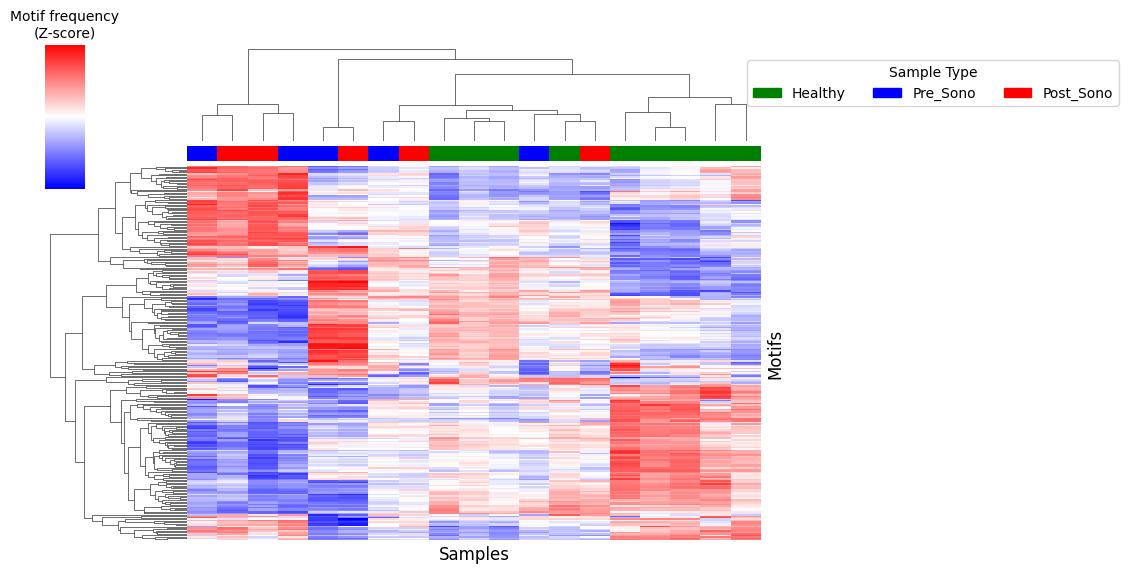

In [11]:
import matplotlib.patches as mpatches

# Create the seaborn clustermap with updated labels
g = sns.clustermap(df_zscore, method='average', cmap='bwr', center=0,
                   row_cluster=True, col_cluster=True, 
                   col_colors=row_colors, figsize=(8,8),  # Adjust the size as needed
                   xticklabels=1, yticklabels=1)

# Set the labels for the axes
g.ax_heatmap.set_xlabel('Samples', fontsize=12)
g.ax_heatmap.set_ylabel('Motifs', fontsize=12)

# Set the label for the color bar
g.cax.set_title('Motif frequency\n(Z-score)', fontsize=10)


# Create legend handles with the specified colors
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in label_colors.items()]



# Add the legend to the figure with the specified colors
g.ax_col_dendrogram.legend(handles=legend_handles, title='Sample Type', loc='center', bbox_to_anchor=(1.3, 0.6), ncol=len(label_colors))


# Rotate the x-axis labels if needed
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)

# Rotate the y-axis labels if needed
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp( plt.gcf().axes, xticks=[], yticks=[])

# Show the plot
plt.show()

In [12]:
# Extract the indices of the rows and columns as ordered in the clustermap
# These indices correspond to the new order after clustering
row_order = g.dendrogram_row.reordered_ind
column_order = g.dendrogram_col.reordered_ind

# Use the indices to reorder the original DataFrame
clustered_df = df_zscore.iloc[row_order, column_order]
clustered_df.columns

Index(['H02_B01-auto.final.dedup_motifs.txt',
       'H02_B03-auto.final.dedup_motifs.txt',
       'H05_B03-auto.final.dedup_motifs.txt',
       'H05_B01b-auto.final.dedup_motifs.txt',
       'H04_B01-auto.final.dedup_motifs.txt',
       'H04_B03-auto.final.dedup_motifs.txt',
       'H01_B01-auto.final.dedup_motifs.txt',
       'H01_B03-auto.final.dedup_motifs.txt',
       'NU45-auto.final.dedup_motifs.txt', 'NU68-auto.final.dedup_motifs.txt',
       'NU56-auto.final.dedup_motifs.txt',
       'H03_B01-auto.final.dedup_motifs.txt',
       'NU20-auto.final.dedup_motifs.txt',
       'H03_B03-auto.final.dedup_motifs.txt',
       'NU103-auto.final.dedup_motifs.txt',
       'NU100-auto.final.dedup_motifs.txt', 'NU95-auto.final.dedup_motifs.txt',
       'NU13-auto.final.dedup_motifs.txt', 'NU69-auto.final.dedup_motifs.txt'],
      dtype='object')

# PCA

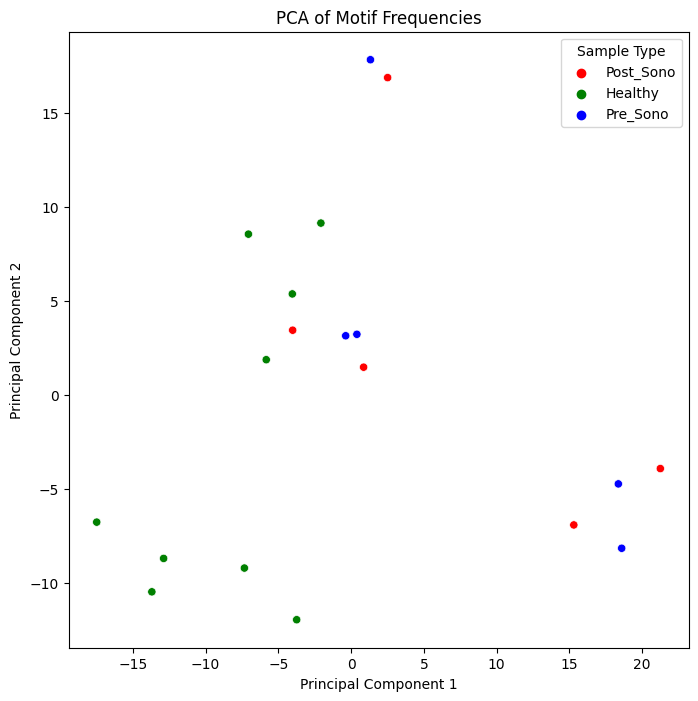

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA model
pca = PCA(n_components=2)  # for 2D projection

# Perform PCA on the Z-score normalized data
pca_result = pca.fit_transform(df_zscore.T)  # transpose to get samples as rows

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# If you have labels for each sample (e.g., healthy or cancer), you can color the points accordingly
# Here's an example if you have a list or array of labels corresponding to the samples order in df_zscore
#labels = np.array(['Healthy' if 'NU' in sample else 'Cancer' for sample in df_zscore.columns])

# Plot the PCA
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', hue=labels, data=pca_df, palette=label_colors)
plt.title('PCA of Motif Frequencies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type')
plt.show()


# MDS

In [14]:
total_cpm = df_cpm.sum(axis=0)  # Sum of CPMs for each sample
relative_frequencies = df_cpm.divide(total_cpm, axis=1)  # Convert CPM to relative frequencies
relative_frequencies.sum()

H05_B03-auto.final.dedup_motifs.txt     1.0
NU13-auto.final.dedup_motifs.txt        1.0
NU100-auto.final.dedup_motifs.txt       1.0
H04_B01-auto.final.dedup_motifs.txt     1.0
H02_B01-auto.final.dedup_motifs.txt     1.0
NU68-auto.final.dedup_motifs.txt        1.0
NU95-auto.final.dedup_motifs.txt        1.0
H01_B01-auto.final.dedup_motifs.txt     1.0
NU20-auto.final.dedup_motifs.txt        1.0
H01_B03-auto.final.dedup_motifs.txt     1.0
H05_B01b-auto.final.dedup_motifs.txt    1.0
H03_B03-auto.final.dedup_motifs.txt     1.0
NU45-auto.final.dedup_motifs.txt        1.0
NU103-auto.final.dedup_motifs.txt       1.0
H03_B01-auto.final.dedup_motifs.txt     1.0
H02_B03-auto.final.dedup_motifs.txt     1.0
NU69-auto.final.dedup_motifs.txt        1.0
NU56-auto.final.dedup_motifs.txt        1.0
H04_B03-auto.final.dedup_motifs.txt     1.0
dtype: float64

In [15]:
print(np.finfo(float).eps)
print(1-np.finfo(float).eps)

2.220446049250313e-16
0.9999999999999998


In [16]:
# Replace any potential zero values with a very small number to avoid log2(0)
relative_frequencies = relative_frequencies.replace(0, np.finfo(float).eps)

# Now you can calculate the MDS
MDS = -np.sum(relative_frequencies * np.log2(relative_frequencies), axis=0) / np.log2(df_cpm.shape[0])

In [17]:
MDS.head()

H05_B03-auto.final.dedup_motifs.txt    0.964255
NU13-auto.final.dedup_motifs.txt       0.967055
NU100-auto.final.dedup_motifs.txt      0.967086
H04_B01-auto.final.dedup_motifs.txt    0.967101
H02_B01-auto.final.dedup_motifs.txt    0.965003
dtype: float64

In [18]:
# Step 1: Assign MDS to Each Sample
# Assuming the 'MDS' variable contains the calculated MDS values for each sample as a pandas Series
MDS_dataframe = pd.DataFrame(MDS, columns=['MDS_Value'])

# Step 2: Map Samples to Groups
# Using the previously defined 'get_label' function and 'pCR_dict'
group_labels = labels  ####################################################################check
# Add the group labels to the MDS DataFrame
MDS_dataframe['Group'] = group_labels
MDS_dataframe.head()

,MDS_Value,Group
H05_B03-auto.final.dedup_motifs.txt,0.964255,Post_Sono
NU13-auto.final.dedup_motifs.txt,0.967055,Healthy
NU100-auto.final.dedup_motifs.txt,0.967086,Healthy
H04_B01-auto.final.dedup_motifs.txt,0.967101,Pre_Sono
H02_B01-auto.final.dedup_motifs.txt,0.965003,Pre_Sono


In [19]:
MDS_dataframe

,MDS_Value,Group
H05_B03-auto.final.dedup_motifs.txt,0.964255,Post_Sono
NU13-auto.final.dedup_motifs.txt,0.967055,Healthy
NU100-auto.final.dedup_motifs.txt,0.967086,Healthy
H04_B01-auto.final.dedup_motifs.txt,0.967101,Pre_Sono
H02_B01-auto.final.dedup_motifs.txt,0.965003,Pre_Sono
NU68-auto.final.dedup_motifs.txt,0.966772,Healthy
NU95-auto.final.dedup_motifs.txt,0.967345,Healthy
H01_B01-auto.final.dedup_motifs.txt,0.966492,Pre_Sono
NU20-auto.final.dedup_motifs.txt,0.966159,Healthy
H01_B03-auto.final.dedup_motifs.txt,0.966212,Post_Sono


In [20]:
MDS_dataframe.to_csv(file_path+"_MDS.txt",sep='\t')

1.0
{('Healthy', 'Pre_Sono'): 0.11188811188811189, ('Healthy', 'Post_Sono'): 0.05994005994005994, ('Pre_Sono', 'Post_Sono'): 1.0}


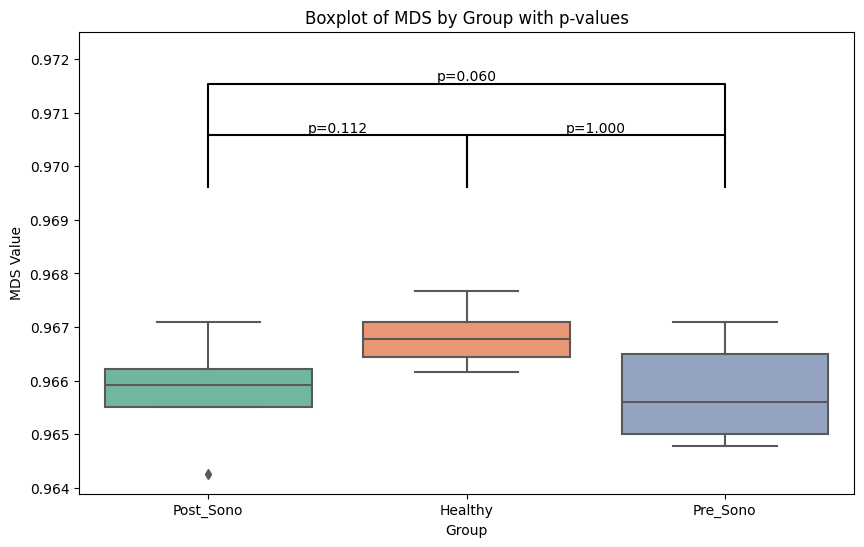

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'MDS_dataframe' has 'MDS_Value' and 'Group' columns and is ready for plotting
# Here we should already have the MDS values in the dataframe along with the group labels.

# Mann-Whitney U test function
def perform_mwu_test(group1, group2, data):
    group1_data = data[data['Group'] == group1]['MDS_Value']
    group2_data = data[data['Group'] == group2]['MDS_Value']
    u_stat, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    return p_value

# Calculate p-values
p_healthy_pcr = perform_mwu_test('Healthy', 'Pre_Sono', MDS_dataframe)
p_healthy_no_pcr = perform_mwu_test('Healthy', 'Post_Sono', MDS_dataframe)
p_pcr_no_pcr = perform_mwu_test('Pre_Sono', 'Post_Sono', MDS_dataframe)

print(p_pcr_no_pcr)
# Plot the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Group', y='MDS_Value', data=MDS_dataframe, palette="Set2")

# Calculate the max y-value for the plot to place the annotations
y_max = MDS_dataframe['MDS_Value'].max()
y_offset = y_max * 0.001  # Dynamic offset based on the max y-value

# Define x-positions for each group for the annotations
x_positions = {'Healthy': 0, 'Pre_Sono': 1, 'Post_Sono': 2}

# Calculate p-values and store them with their respective group pairs
p_values = {
    ('Healthy', 'Pre_Sono'): p_healthy_pcr,
    ('Healthy', 'Post_Sono'): p_healthy_no_pcr,
    ('Pre_Sono', 'Post_Sono'): p_pcr_no_pcr
}

print(p_values)
# Draw the connectors and annotations
for (group1, group2), p_value in p_values.items():
    x1, x2 = x_positions[group1], x_positions[group2]
    # Set the y position for the line
    y = y_max + y_offset * (1 + x_positions[group2] - x_positions[group1])
    # Draw line
    ax.plot([x1, x1, x2, x2], [y, y + y_offset, y + y_offset, y], lw=1.5, c='k')
    # Annotate line with p-value
    ax.text((x1+x2)*.5, y + y_offset, f"p={p_value:.3f}", ha='center', va='bottom', color='k')

# Set y-axis limit to include annotations
ax.set_ylim(ax.get_ylim()[0], y + y_offset * 3)

plt.title('Boxplot of MDS by Group with p-values')
plt.xlabel('Group')
plt.ylabel('MDS Value')
plt.show()

,MDS_Value,Group
H05_B03-auto.final.dedup_motifs.txt,0.964255,Post_Sono
H04_B01-auto.final.dedup_motifs.txt,0.967101,Pre_Sono
H02_B01-auto.final.dedup_motifs.txt,0.965003,Pre_Sono
H01_B01-auto.final.dedup_motifs.txt,0.966492,Pre_Sono
H01_B03-auto.final.dedup_motifs.txt,0.966212,Post_Sono


1.0


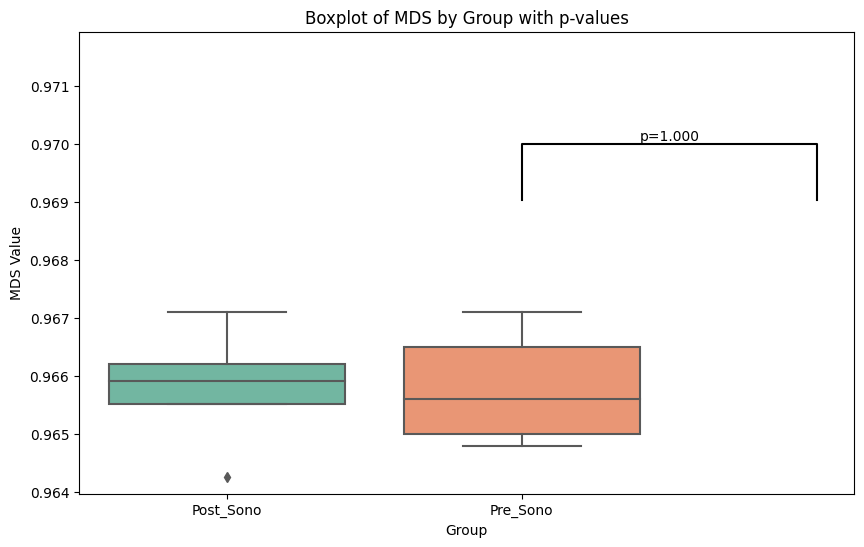

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'MDS_dataframe_filtered' has 'MDS_Value' and 'Group' columns and is ready for plotting
# Here we should already have the MDS values in the dataframe along with the group labels.

MDS_dataframe_filtered = MDS_dataframe.loc[MDS_dataframe['Group'] != 'Healthy']
display(MDS_dataframe_filtered.head())
# Calculate p-values
# p_healthy_pcr = perform_mwu_test('Healthy', 'Pre_Sono', MDS_dataframe_filtered)
# p_healthy_no_pcr = perform_mwu_test('Healthy', 'Post_Sono', MDS_dataframe_filtered)
p_pcr_no_pcr = perform_mwu_test('Pre_Sono', 'Post_Sono', MDS_dataframe_filtered)

print(p_pcr_no_pcr)

# Plot the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Group', y='MDS_Value', data=MDS_dataframe_filtered, palette="Set2")

# Calculate the max y-value for the plot to place the annotations
y_max = MDS_dataframe_filtered['MDS_Value'].max()
y_offset = y_max * 0.001  # Dynamic offset based on the max y-value

# # Define x-positions for each group for the annotations
# x_positions = {'Healthy': 0, 'Pre_Sono': 1, 'Post_Sono': 2}

# Calculate p-values and store them with their respective group pairs
p_values = {
    
    ('Pre_Sono', 'Post_Sono'): p_pcr_no_pcr
}

# Draw the connectors and annotations
for (group1, group2), p_value in p_values.items():
    x1, x2 = x_positions[group1], x_positions[group2]
    # Set the y position for the line
    y = y_max + y_offset * (1 + x_positions[group2] - x_positions[group1])
    # Draw line
    ax.plot([x1, x1, x2, x2], [y, y + y_offset, y + y_offset, y], lw=1.5, c='k')
    # Annotate line with p-value
    ax.text((x1+x2)*.5, y + y_offset, f"p={p_value:.3f}", ha='center', va='bottom', color='k')

# Set y-axis limit to include annotations
ax.set_ylim(ax.get_ylim()[0], y + y_offset * 3)

plt.title('Boxplot of MDS by Group with p-values')
plt.xlabel('Group')
plt.ylabel('MDS Value')
plt.show()